In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv


%matplotlib widget

In [2]:
# load and clean data
input_file = '/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/hlsp_hugs_hst_wfc3-uvis-acs-wfc_ngc0104_multi_v1_catalog-meth1.txt'
df = pd.read_csv(input_file, header=None, delim_whitespace=True, 
                   usecols=[0, 1, 2, 5, 8, 11, 14, 17, 20, 23, 26, 29, 32], 
                   names=['X','Y','F275W','rad_275','F336W','rad_336','F435W','rad_435','F606W','rad_606','F814W','rad_814','prob_member'], skiprows=55)

df = df.apply(pd.to_numeric, errors='coerce')
df = df.dropna()

In [3]:
# flag the data that are ok (membership probability and radxs)
# set the conditions
conditions = (
    (df['prob_member'] >= 90) & 
    (np.abs(df['rad_275']) < 0.2) &
    (np.abs(df['rad_336']) < 0.2) &
    (np.abs(df['rad_435']) < 0.2) &
    (np.abs(df['rad_606']) < 0.2) &
    (np.abs(df['rad_814']) < 0.2) 
    )   

# assign the flag 
df['flag'] = np.where(conditions, 1, 0)

In [4]:
# select the data with flag 1 
data = df[df['flag'] == 1]

In [5]:
fiducial = []

def on_click(event):
    if event.xdata is not None and event.ydata is not None:  # Ensure the click is within the plot area
        fiducial.append((event.xdata, event.ydata))
        print(f"Point selected: ({event.xdata:.2f}, {event.ydata:.2f})")


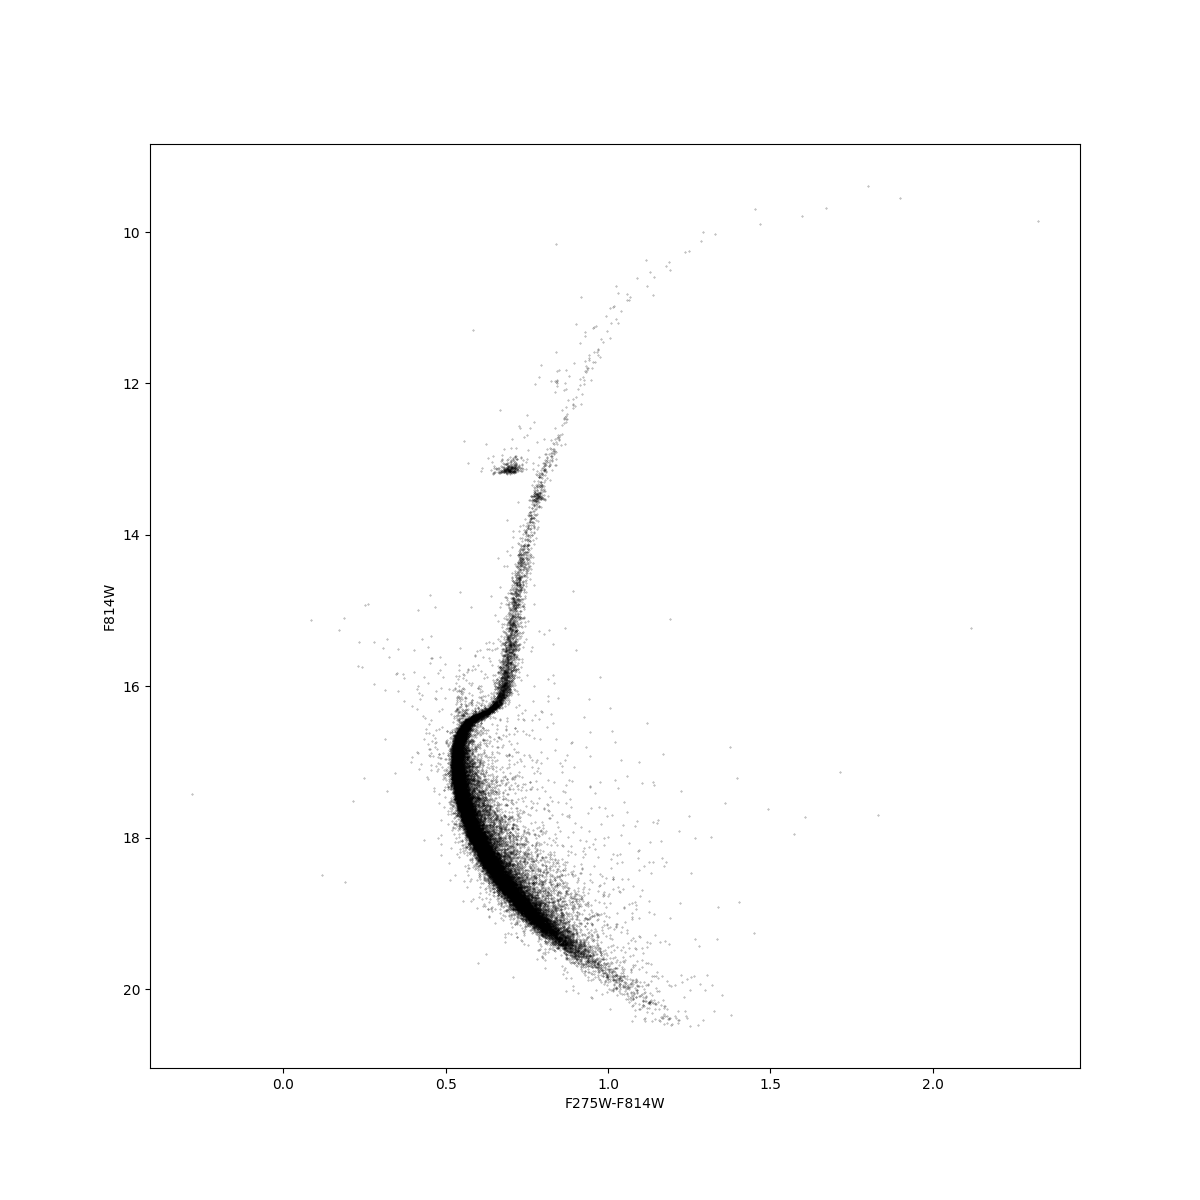

Point selected: (0.86, 19.34)
Point selected: (0.81, 19.21)
Point selected: (0.75, 18.86)
Point selected: (0.67, 18.57)
Point selected: (0.62, 18.28)


In [6]:
fig = plt.figure(figsize=(12,12))
plt.scatter(data['F606W']-data['F814W'], data['F814W'], 
            s=0.1, alpha=0.5, c='black')
plt.gca().invert_yaxis()

plt.xlabel('F275W-F814W')
plt.ylabel('F814W')

cid = fig.canvas.mpl_connect('button_press_event', on_click)

plt.show()


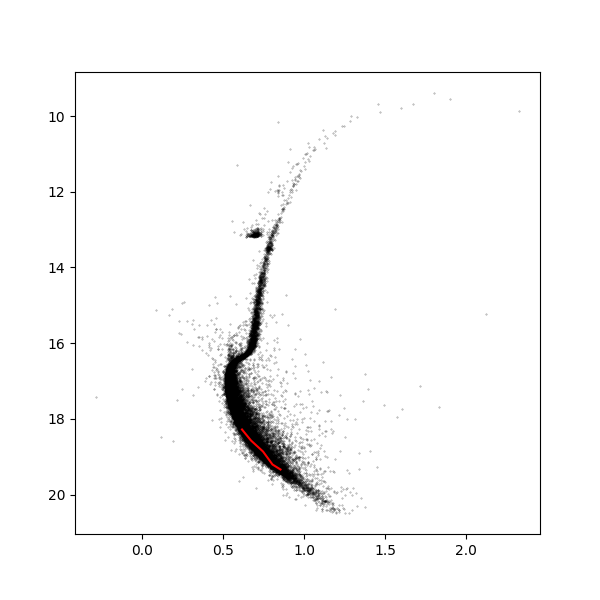

In [8]:
# Extract selected points into separate arrays
x, y = zip(*fiducial) if fiducial else ([], [])

fig = plt.figure(figsize=(6,6))
plt.scatter(data['F606W']-data['F814W'], data['F814W'], 
            s=0.1, alpha=0.5, c='black')
plt.plot(x, y, 'r-')
plt.gca().invert_yaxis()

plt.show()

In [46]:
# Save fiducial to a CSV file
'''
with open('/Users/giadaaggio/Desktop/Thesis/TOTORO/FITS/47_Tuc/fiducial_275_814.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x', 'y'])
    writer.writerows(fiducial)

'''